<a href="https://colab.research.google.com/github/redpineK/deeplearning/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



출처: https://hdevstudy.tistory.com/127 [김인연의 개발 공부:티스토리]



In [1]:
import numpy as np

t = np.arange(0, 1000)
x = np.sin(0.02 * t) + np.random.rand(1000)
train, test = x[0:800], x[800:1000]


In [7]:
print(len(train))

800


In [ ]:
# INPUT			                	OUTPUT
# sin(0) sin(1) sin(2) sin(3)	sin(4)
# sin(1) sin(2) sin(3) sin(4)	sin(5)
# sin(2) sin(3) sin(4) sin(5)	sin(6)
# ...


In [16]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step  
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))
print(len(train))
print(len(test))
print(train[-5:-1])
train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))


820
220
[-0.24315311 -0.24315311 -0.24315311 -0.24315311]


In [12]:
train

array([ 0.80334314,  0.93559934,  0.18759779,  0.0921303 ,  0.91993784,
        0.53047521,  1.007844  ,  0.4940033 ,  0.96621328,  0.83481297,
        0.78500773,  0.45128435,  1.21642368,  1.06277462,  0.79125803,
        1.10547898,  1.22445455,  0.4939306 ,  0.50775678,  1.05825061,
        0.97823848,  1.12908221,  0.97535647,  1.333559  ,  0.94220774,
        1.38571436,  1.39836851,  0.60442802,  0.73973011,  0.64085767,
        1.31779228,  0.89142531,  1.43659741,  1.20241987,  1.11148246,
        1.18711959,  1.35434893,  1.23911174,  1.60534751,  1.43222264,
        1.2665045 ,  0.88500784,  1.44528906,  0.80885917,  0.83273016,
        1.34432561,  1.16734071,  1.65479589,  1.26031346,  1.60644858,
        1.42153178,  1.76526   ,  1.47080246,  1.66762235,  1.16715535,
        1.34453431,  0.96660002,  1.16063594,  1.55470054,  1.20167538,
        1.82007973,  1.31917153,  1.1728602 ,  1.15102995,  1.37455849,
        1.74264735,  1.04063326,  1.59824511,  0.99401548,  1.13

In [10]:
train_y

array([ 0.91993784,  0.53047521,  1.007844  ,  0.4940033 ,  0.96621328,
        0.83481297,  0.78500773,  0.45128435,  1.21642368,  1.06277462,
        0.79125803,  1.10547898,  1.22445455,  0.4939306 ,  0.50775678,
        1.05825061,  0.97823848,  1.12908221,  0.97535647,  1.333559  ,
        0.94220774,  1.38571436,  1.39836851,  0.60442802,  0.73973011,
        0.64085767,  1.31779228,  0.89142531,  1.43659741,  1.20241987,
        1.11148246,  1.18711959,  1.35434893,  1.23911174,  1.60534751,
        1.43222264,  1.2665045 ,  0.88500784,  1.44528906,  0.80885917,
        0.83273016,  1.34432561,  1.16734071,  1.65479589,  1.26031346,
        1.60644858,  1.42153178,  1.76526   ,  1.47080246,  1.66762235,
        1.16715535,  1.34453431,  0.96660002,  1.16063594,  1.55470054,
        1.20167538,  1.82007973,  1.31917153,  1.1728602 ,  1.15102995,
        1.37455849,  1.74264735,  1.04063326,  1.59824511,  0.99401548,
        1.13798386,  1.72487541,  1.62369102,  1.22654604,  1.51

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, 4), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

# Layer (type)                 Output Shape              Param #   
# =================================================================
# simple_rnn (SimpleRNN)       (None, 32)                1184      
# _________________________________________________________________
# dense (Dense)                (None, 8)                 264       
# _________________________________________________________________
# dense_1 (Dense)              (None, 1)                 9         
# =================================================================
# Total params: 1,457
# Trainable params: 1,457
# Non-trainable params: 0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=100, batch_size=16)


Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0923 - acc: 0.0000e+00
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0934 - acc: 0.0000e+00
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0918 - acc: 0.0000e+00
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0919 - acc: 0.0000e+00
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0930 - acc: 0.0000e+00
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0925 - acc: 0.0000e+00
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0932 - acc: 0.0000e+00
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0927 - acc: 0.0000e+00
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0914 - acc: 0.0000e+00
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0919 - acc: 0.0000e+00
Epoch 11/100
50/50 

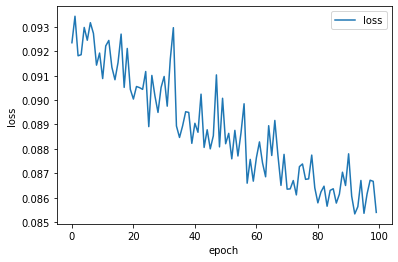

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('loss: {:.4f}\nacc: {:.4f}'.format(test_loss, test_acc))
# loss: 0.1183
# acc: 0.0000


7/7 [==============================] - 0s 3ms/step - loss: 0.1043 - acc: 0.0000e+00
loss: 0.1043
acc: 0.0000


0.06062847551737588 [0.50533634]
0.2117438029215591 [0.43831894]
0.5242531427622934 [0.42902532]
0.5429835385616067 [0.48721257]
-0.23113846966306495 [0.41342425]


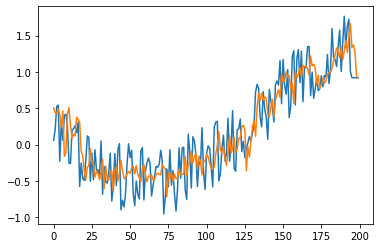

In [ ]:
test_predictions = model.predict(test_x)

for i in range(5):
    print(test_y[i], test_predictions[i])
# 0.38551802173851374 [0.20283031]
# -0.021098359361594488 [0.06128622]
# -0.036755569826498524 [-0.08885847]
# -0.08457433557120209 [0.23765944]
# 0.30249685570373663 [0.01381123]

plt.plot(test_y)
plt.plot(test_predictions)
plt.show()
